## Исследование данных о российском кинопрокате



### Описание проекта

Нужно изучить рынок российского кинопроката и выявить текущие тренды.    Уделить внимание фильмам, которые получили государственную поддержку. Понять насколько такие фильмы интересны зрителю. 



### Описание данных

Таблица содержит информацию из реестра прокатных удостоверений. 


###  Изучим  данные и объединим их в один датафрейм. 



In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('...')

In [3]:
shows = pd.read_csv('...')


объеденим две таблицы по столбцу puNumber, но сначала поменяем тип данных  в таблице. Меняем на строку так как это колока номер прокатного удостоверения, это как имя, с ним проводить математические действия нельзя.  

In [4]:
shows['puNumber'] = shows['puNumber'].astype('str')

In [5]:
data = movies.merge(shows, on='puNumber',how='outer')


После объединения таблиц в новой таблице получилось 7486 строк и 16 столбцов. Строк столько же, сколько и в первой таблице. По заданю все строки из первой таблице должны были войти в новую таблицу. Для объединения был использован тип слияния outer, он объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов. Таким образом в таблицу попали все строки. Столбцов стала на один больше, так как новый столбец перешел из второй таблице. 

##  Предобработка данных

### Проверка типов данных



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [7]:
# Поменяем тип данных с столбце с датой
data['show_start_date_datetime'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')


In [8]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Чтобы преобразовать тип данных в этой колонке, нужно поменять проценты на вещественные числа, 
для этого удалим знак %.

In [9]:
data['ratings'] = data['ratings'].str.replace('%','')

In [10]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '28',
       '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8',
       '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7',
       '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.7', '6.8', '6.9', '62', '64', '7.0', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79', '8.0', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '83', '88',
       '89', '9.0', '9.1', '9.2', '90', '91', '94', '97', '98', '99', nan],
      dtype=object)

In [11]:
data['ratings'] = data['ratings'].astype('float')

Скорее всего те значения где был знак процент, отличаются от остальных рейтингов типом записи. Если разделить это число на 10, то тип записи будет совпадать с остальными значениями

In [12]:
data.loc[data['ratings'] >= 19, 'ratings'] = data.loc[data['ratings'] >= 19, 'ratings'] / 10

In [13]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

### Изучим пропуски в датафрейме



In [14]:
data.isna().sum()

title                          0
puNumber                       0
show_start_date                0
type                           0
film_studio                   18
production_country             2
director                       9
producer                     568
age_restriction                0
refundable_support          7154
nonrefundable_support       7154
budget                      7154
financing_source            7154
ratings                      967
genres                       976
box_office                  4328
show_start_date_datetime       0
dtype: int64

In [15]:
data.isnull().mean() * 100

title                       0.0
puNumber                    0.0
show_start_date             0.0
type                        0.0
film_studio                 0.2
production_country          0.0
director                    0.1
producer                    7.6
age_restriction             0.0
refundable_support         95.6
nonrefundable_support      95.6
budget                     95.6
financing_source           95.6
ratings                    12.9
genres                     13.0
box_office                 57.8
show_start_date_datetime    0.0
dtype: float64

Пропуски в рейтингах оставим без изменений. Тип данных float позволит проводитьс сними математические действия не заполняя пропуски.

Очень много пропусков в бюджете и объемах возвратных и не возвратных средств государственной поддержки. Не будем их заполныть, так как это может исказить этот небольшой объем данных. И также данные в этих столбцах указанны только для тех фильмов, которые получили государственную поддержку, данных нет, значит поддержку не получали. 
тоже относится к источнику государственного финансирования.

Сборы в рублях также оставим без изменений, так как заполнение пропусков медианой или средней могут исказить данные в будующем, пропусков 57%

В остальных случаях мы имеем категориальный тип данных. Логически заполнить мы их не сможем, но для выполнения операций отсутствующее значение может мешать. Заменим его на пустую строку.

In [16]:
data['producer'] = data['producer'].fillna(value='') 

In [17]:
data['genres'] = data['genres'].fillna(value='') 

In [18]:
data['film_studio'] = data['film_studio'].fillna(value='') 

In [19]:
data['production_country'] = data['production_country'].fillna(value='') 

In [20]:
data['director'] = data['director'].fillna(value='') 

In [21]:
data.isna().sum()

title                          0
puNumber                       0
show_start_date                0
type                           0
film_studio                    0
production_country             0
director                       0
producer                       0
age_restriction                0
refundable_support          7154
nonrefundable_support       7154
budget                      7154
financing_source            7154
ratings                      967
genres                         0
box_office                  4328
show_start_date_datetime       0
dtype: int64

### Изучим дубликаты в датафрейме


In [22]:
data.duplicated().sum()  

0

В таблице нет полных дубликатов(по всем столбцам)

In [23]:
data['title'].duplicated().sum()

714

In [24]:
data['title'] = data['title'].str.replace('ё', 'е')
data['title'].duplicated().sum()

716

In [25]:
data['title'] = data['title'].str.lower()
data['title'].duplicated().sum()

726

In [26]:
data['title'] = data['title'].str.replace('-','')
data['title'] = data['title'].str.replace('_','')
data['title'] = data['title'].str.replace('/','')
data['title'] = data['title'].str.replace('.','')
data['title'].duplicated().sum()

/tmp/ipykernel_131/416283902.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['title'] = data['title'].str.replace('.','')


809

Убрали букву ё и сделали все названия в нижнем регистре, поменяли все тире на пропуски это нам поможет обнаружить больше повторов

In [27]:
data['title'].value_counts().head(30)

день святого валентина                            5
волшебная страна                                  5
доброе утро                                       5
дитя тьмы                                         4
рапунцель: запутанная история                     4
непокоренный                                      4
химера                                            4
там, где живут чудовища                           4
красавчик2                                        4
белоснежка и охотник                              4
не брать живым по книге раджива чандрасекарана    4
соблазнитель                                      4
лузеры                                            4
робин гуд (robin hood)                            4
форсаж 7                                          4
двойной копец                                     4
кошки против собак: месть китти галор             4
дорога по новелле кормака мккарфи                 4
дом грез                                          4
безумцы     

Нашли 809 дубликатов. В информации к проекту было сказано что у одного фильма может быть несколько прокатных удостоверений. Поэтому оставляем все дубликаты в названиях и проверим дубли в номерах прокатных удостоверений. 

In [28]:
data['puNumber'].duplicated().sum()

2

Два дубликата, удалим их

In [29]:
data = data.drop_duplicates(subset=['puNumber'], keep='first').reset_index(drop=True)
data['puNumber'].duplicated().sum()

0

### Изучим категориальные значения


In [30]:
data['type'].unique() 

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [31]:
# Убирем пробел в начале слова
data['type'] = data['type'].str.strip()
data['type'].unique() 

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [32]:
data['film_studio'].sort_values().unique()

array(['', ' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.', ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

In [ ]:
data['production_country'].sort_values().unique()

Очень много строк с разным разделением. заменим все '-' на ','

In [35]:
data['production_country'] = data['production_country'].str.replace('-',',')
data['production_country'] = data['production_country'].str.replace(' ','')

In [36]:
data['production_country'] = data['production_country'].str.strip()


Привели данные в столбце со странами к одному виду, убрали тире между странами

In [37]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [38]:
# Сделаем дополниельный столбец где будут указанны только цифры
def cetegory_age(row):
    try:
        if '0' in row:
            return '0'
        elif '6' in row:
            return '6'
        elif '12' in row:
            return '12'
        elif '16' in row:
            return '16'
        elif '18' in row:
            return '18'
    except:
        pass
    

In [39]:
data['age_category'] = data['age_restriction'].apply(cetegory_age)
data['age_category'].unique()

array(['18', '6', '12', '0'], dtype=object)

In [40]:
data['age_category'] = data['age_category'].astype('int')

Сделали новы столбец с информацией о возрасте, убрали все лишние слова, оставили только цифры. 

In [ ]:
data['genres'].sort_values().unique()

In [42]:
data['financing_source'].sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

Жанр и финансирование оставляем как есть

### Проверим количественные значения



In [43]:
# добавим столбец с общим объёмом государственной поддержки
data['support'] = data['refundable_support'] + data['nonrefundable_support']

Сравним бюджет и гос поддержку

In [44]:
data_b = data.query('budget < support')
data_b.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_datetime,age_category,support
2053,14+,111023614,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1",2014-12-19 12:00:00+00:00,6,"23,000,000.0"
2058,дуxless 2,111000415,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0",2015-01-26 12:00:00+00:00,6,"75,000,000.0"
2472,воин (2015),111017315,2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4",2015-09-28 12:00:00+00:00,12,"80,000,000.0"


Есть строки где в бюджете 0, но при этом фильмы получили государственную поддержку. Скорее всего тут ошибка в бюджете. Оставим строки так как данных и так мало. В будущем при исследовании учтем это

### Добавим новые столбцы





Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [45]:
data['year_show_start'] = data['show_start_date_datetime'].dt.year
data['year_show_start']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7479    2019
7480    2019
7481    2019
7482    2019
7483    2019
Name: year_show_start, Length: 7484, dtype: int64

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [46]:
data['director_to_list'] = data['director'].str.split(',')
data['director_to_list'].head(20)

0                  [Кевин Костнер]
1                      [Е.Матвеев]
2              [Тимур Бекмамбетов]
3              [Тимур Бекмамбетов]
4              [Тимур Бекмамбетов]
5                   [В.Абдрашитов]
6                      [В.Меньшов]
7                  [Джон Туртурро]
8                   [Эрик Беснард]
9                        [В.Титов]
10                 [Пол Грингросс]
11                 [М.Туманишвили]
12                  [Клинт Иствуд]
13           [Фернанду Мейрелльеш]
14                   [Майк Фиггис]
15                    [А.Салтыков]
16                     [Г.Данелия]
17                     [А.Смирнов]
18                     [Ю.Чулюкин]
19    [В.Краснопольский,  В.Усков]
Name: director_to_list, dtype: object

In [47]:
for i in range(len(data)):
    data['director_to_list'].iloc[i]=data['director_to_list'].iloc[i][0]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
data['genres_to_list'] = data['genres'].str.split(',')
data['genres_to_list']

0          [боевик, драма, мелодрама]
1                    [драма, военный]
2       [фантастика, боевик, триллер]
3       [фантастика, боевик, триллер]
4       [фантастика, боевик, триллер]
                    ...              
7479                               []
7480                [боевик, триллер]
7481                               []
7482                               []
7483               [комедия, вестерн]
Name: genres_to_list, Length: 7484, dtype: object

In [49]:
for i in range(len(data)):
    data['genres_to_list'].iloc[i]=data['genres_to_list'].iloc[i][0]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [50]:
data_budget = data.query('budget >= 1')
data_budget['support_precent'] = (data_budget['support'] / data_budget['budget'] * 100).round()


/tmp/ipykernel_131/3201365823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_budget['support_precent'] = (data_budget['support'] / data_budget['budget'] * 100).round()


<AxesSubplot:>

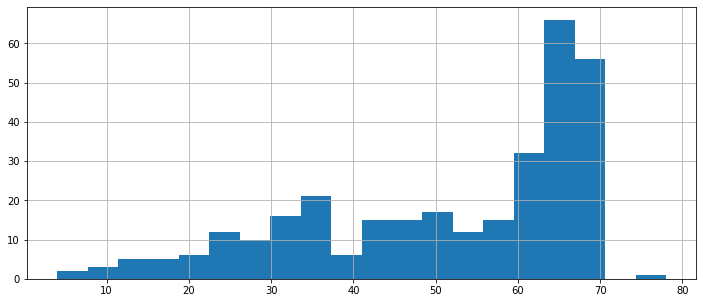

In [51]:
data_budget['support_precent'].hist(bins=20, grid=True, figsize=(12,5))

Гос поддержка в большенстве случаев составляем 60-70%

## Провидем исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. 



In [52]:
data_1 = data.groupby('year_show_start')['box_office'].count()
data_1

year_show_start
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

Посмотрим какое количество фильмов вышло в прокат всего:

In [53]:
data_2 = data.groupby('year_show_start')['puNumber'].count()
data_2

year_show_start
2010    983
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: puNumber, dtype: int64

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [54]:
data_3 = (data_1 / data_2) * 100 
data_3

year_show_start
2010   10.7
2011   17.5
2012   21.6
2013   29.2
2014   34.6
2015   66.0
2016   64.3
2017   70.7
2018   53.3
2019   57.0
dtype: float64

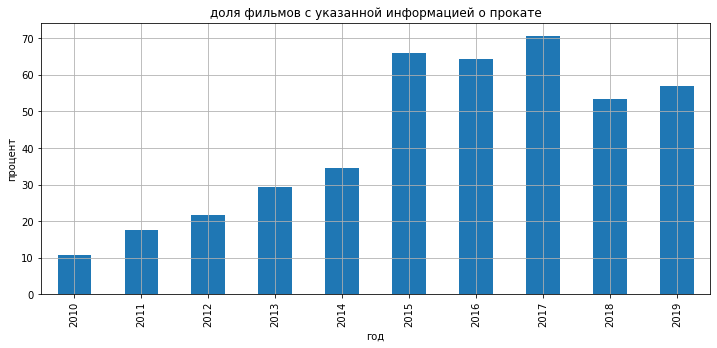

In [55]:
data_3.plot(kind='bar', grid=True, figsize=(12,5)) 
plt.title('доля фильмов с указанной информацией о прокате');
plt.xlabel('год');
plt.ylabel('процент')
plt.show()

Можно сделать вывод что с 2015 по 2019 года у нас есть наибольшее количество данных о сборах в кинотеатрах. С 2010 по 2014 процент представленных данных по прокату в кинотеатрах составляем меньше 40%. 

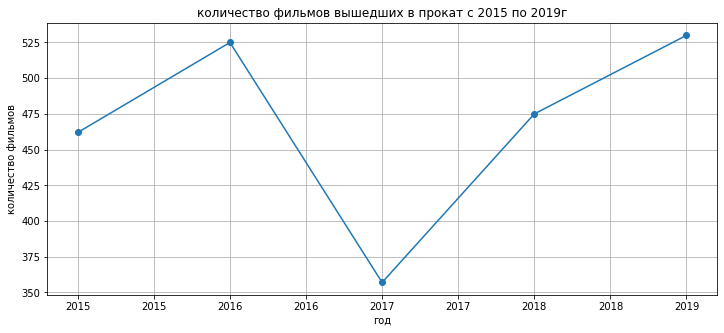

In [56]:
data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0').groupby(
    'year_show_start')['box_office'].count().plot(
    style='o-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('количество фильмов вышедших в прокат с 2015 по 2019г');
plt.xlabel('год');
plt.ylabel('количество фильмов')
plt.show()

Самое большое количество фильмов, которое выходило в прокат было в 2016 и 2019 годах, минимальное в 2017.

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

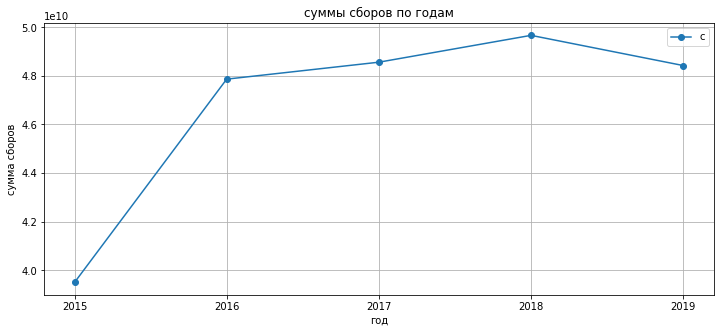

In [57]:
data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0').pivot_table(
    index='year_show_start', values ='box_office', aggfunc='sum').plot(
    style='o-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.xticks(data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0')['year_show_start'].unique())
plt.title('суммы сборов по годам');
plt.xlabel('год');
plt.ylabel('сумма сборов')
plt.legend('сборы')

plt.show()


Mаксимальные сборы были в 2019году, минимальные сборы были в 2015 году. 

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [58]:
data.query('box_office > 0 and budget > 0').pivot_table(
    index='year_show_start', values ='box_office', aggfunc=['median','mean'])

,median,mean
,box_office,box_office
year_show_start,,
2013,"10,161,192.6","10,161,192.6"
2014,"4,731,239.5","67,145,876.7"
2015,"4,568,857.3","60,958,828.1"
2016,"16,814,329.5","86,977,620.5"
2017,"48,557,861.0","290,797,711.8"
2018,"23,225,573.2","183,031,870.8"
2019,"24,101,208.4","140,034,247.9"


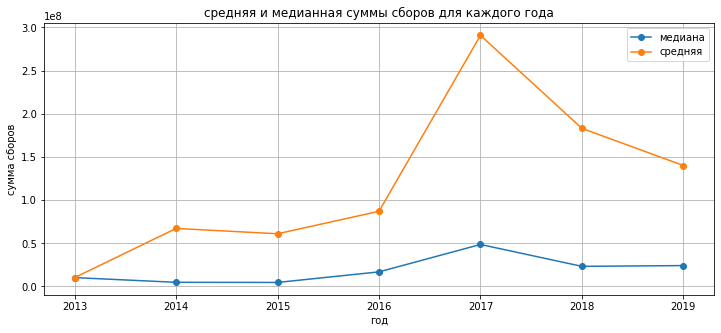

In [59]:
data.query('box_office > 0 and budget > 0').pivot_table(
    index='year_show_start', values ='box_office', aggfunc=['median','mean']).plot(
    style='o-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('средняя и медианная суммы сборов для каждого года');
plt.xlabel('год');
plt.ylabel('сумма сборов')
plt.legend(['медиана','средняя'])
plt.show()

В 2017 году были максимальные сборы. Если смотреть на среднюю и медиану, то можно увидеть насколько среднее значения больше медианного. Это может говорить нам о том что был фильм который получил самое большое количество сборов и за счет этого фильма сборы за год получились настолько высокие

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

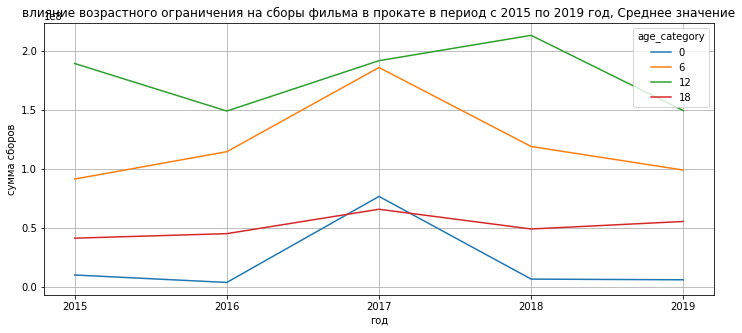

In [60]:
data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0').pivot_table(
    index='year_show_start', columns='age_category', values='box_office', aggfunc='mean').plot(
    style ='-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.xticks(data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0')['year_show_start'].unique())
plt.title('влияние возрастного ограничения на сборы фильма в прокате в период с 2015 по 2019 год, Среднее значение');
plt.xlabel('год');
plt.ylabel('сумма сборов')
plt.show()

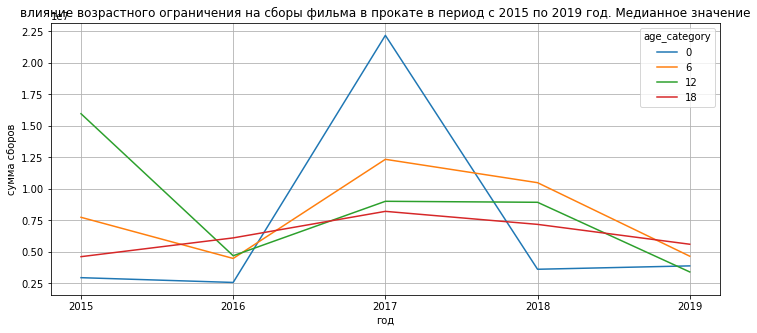

In [61]:
data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0').pivot_table(
    index='year_show_start', columns='age_category', values='box_office', aggfunc='median').plot(
    style ='-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.xticks(data.query('year_show_start == [2015,2016,2017,2018,2019] and box_office > 0')['year_show_start'].unique())
plt.title('влияние возрастного ограничения на сборы фильма в прокате в период с 2015 по 2019 год. Медианное значение');
plt.xlabel('год');
plt.ylabel('сумма сборов')
plt.show()

В 2017 году фильм с рейтингом 0+ получил самые большие сборы. Скорее всего за счет этого фильма в 2017 году самые большие сборы у кинотеатров.

Если рассматривать все года, то на графике со средней видно что фильмы 12+ и 6+ пользуются большей популярностью и выигрывают по сборамм, чем фильмы 18+ и 0+

## Исследуем фильмы, которые получили государственную поддержку



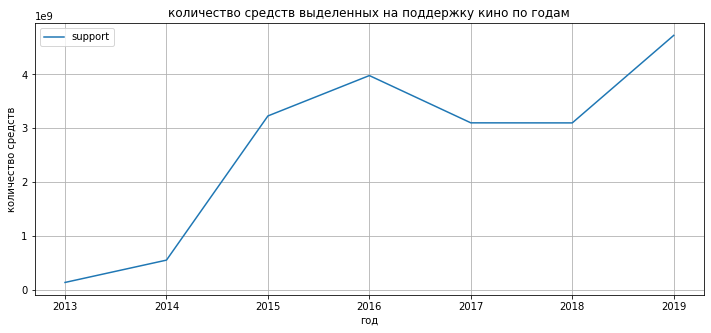

In [62]:
data.query('budget > 0').pivot_table(index='year_show_start',values='support',aggfunc='sum').plot(
    grid=True, figsize=(12,5))
plt.title('количество средств выделенных на поддержку кино по годам');
plt.xlabel('год');
plt.ylabel('количество средств')
plt.show()

Больше всего средст было выделено в 2016 и 2019 годах

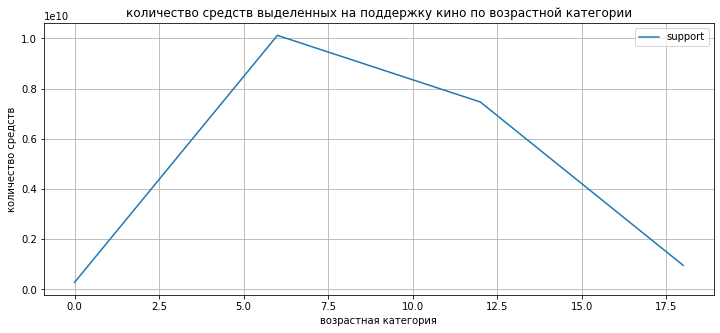

In [63]:
data.query('budget > 0').pivot_table(index='age_category',values='support',aggfunc='sum').plot(
    grid=True, figsize=(12,5))
plt.title('количество средств выделенных на поддержку кино по возрастной категории');
plt.xlabel('возрастная категория');
plt.ylabel('количество средств')
plt.show()

Основное большенство средст выделяется на фильмы 6+

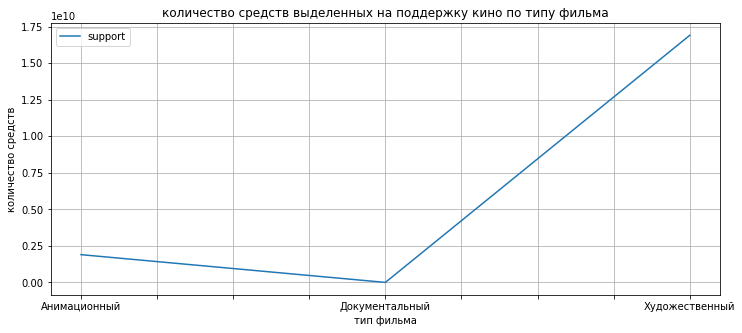

In [64]:
data.query('budget > 0').pivot_table(index='type',values='support',aggfunc='sum').plot(
    grid=True, figsize=(12,5))
plt.title('количество средств выделенных на поддержку кино по типу фильма');
plt.xlabel('тип фильма');
plt.ylabel('количество средств')
plt.show()

Основное большенство средст выделяется на художественные фильмы

Проверим как влияет гос поддержка на окупаемость фильмов:

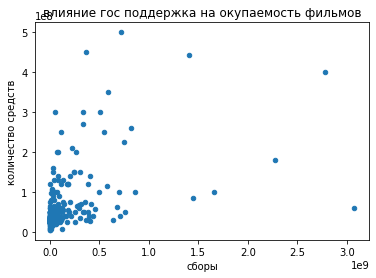

In [65]:
data.query('box_office > 0 and budget > 0').pivot_table(
    index='puNumber',values=['box_office','support'],aggfunc='sum').plot(
    x='box_office',y='support', kind='scatter')
plt.title('влияние гос поддержка на окупаемость фильмов');
plt.xlabel('сборы');
plt.ylabel('количество средств')
plt.show()

In [66]:
data['box_office'].corr(data['support'])

0.48897593177660037

Корреляция в 0.48 говорит о наличии не слишком сильной связи. 

Проверим как влияет гос поддержка на рейтинг фильма:

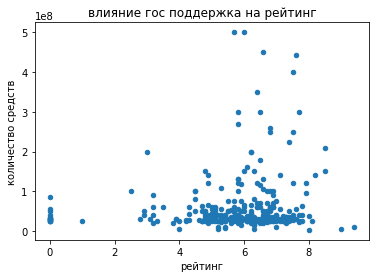

In [67]:
data.query('budget > 0').pivot_table(index='puNumber',values=['ratings','support'],aggfunc='sum').plot(
    x='ratings',y='support', kind='scatter')
plt.title('влияние гос поддержка на рейтинг');
plt.xlabel('рейтинг');
plt.ylabel('количество средств')
plt.show()

In [68]:
data['ratings'].corr(data['support'])

0.1022221631984775

Нет связи

## Общий вывод

Изучили и обработали данные из таблиц.
Посмотрели, сколько фильмов выходило в прокат каждый год и также посчитали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Из этих данных сделали вывод, что:
- наиболее полно были представленные данные с 2015 по 2019 год.

При изучении данных по этим годам нашли, что:
- самое большое количество фильмов выходило в прокат в 2016 и 2019 годах, минимальное в 2015.
- максимальные сборы в прокате были в 2018 году, минимальные в 2015.

Изучили влияние возрастного ограничения на сборы фильма в прокате. Фильмы с маркировкой 12+ и 6+ пользуются большей популярностью и выигрывают по сборам, чем фильмы 18+ и 0+.

Изучили фильмы, которые получили государственную поддержку:
- поддержка таких фильмов составляет 60-70% из общего бюджета. 
- это художественные фильны 
- категории 6+
- самая большая поддержка была в 2016 и 2019 годах.

Из исследования сделали вывод что гос поддержка не сильно влияет на окупаемость фильма и на рейтинг фильма не влияет совсем.

